In [1]:
%matplotlib notebook

In [2]:
# Import.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import calendar

# Reference files.
disney_file = "Resources/DisneyHistoricalStockPriceData.csv"
NYT_file = "Resources/NYT_Article_Pull.csv"

# Read csv.
disney_df = pd.read_csv(disney_file, encoding="ISO-8859-1")
nyt_df = pd.read_csv(NYT_file, encoding="ISO-8859-1")

In [3]:
# Clean disney data.
disney_df.columns = ["date","open","high","low","close","volume"]
disney_df = disney_df[disney_df["open"] != "Open"]

In [4]:
# Create Week column to group data by week.
disney_df[["Year","Month","Day"]] = disney_df.date.str.split("-",expand=True)
disney_df["date"] = pd.to_datetime(disney_df["date"])
disney_df["Day of Week"] = disney_df["date"].dt.dayofweek
disney_df["Week"] = disney_df["date"] -  pd.to_timedelta(disney_df["Day of Week"], unit='d')

In [5]:
# Filter for dates after 1980.
disney_df["Year"] = pd.to_numeric(disney_df["Year"])
disney_df = disney_df[disney_df["Year"] >= 1980]
disney_df = disney_df[["date","open","close","Day of Week","Week"]]

In [6]:
# Clean data to matchup start of week with end of week.
disney_df["close"] = disney_df["close"].shift(3)

In [7]:
# Remove null values.
disney_df = disney_df.dropna(how='any')

In [8]:
# Filter for the day of the start of week.
disney_df["Day of Week"] = pd.to_numeric(disney_df["Day of Week"])
disney_df = disney_df[disney_df["Day of Week"] == 0]

In [9]:
# Caluclate weekly change.
disney_df["close"] = pd.to_numeric(disney_df["close"])
disney_df["open"] = pd.to_numeric(disney_df["open"])
disney_df["Week Change"] = disney_df["close"] - disney_df["open"]

In [10]:
# Create cleaned data table.
disney_df = disney_df[["Week","Week Change"]]
disney_df.head()

,Week,Week Change
4,2020-06-15,6.29
9,2020-06-08,-12.46
14,2020-06-01,6.43
19,2020-05-25,-1.27
24,2020-05-18,3.36


In [11]:
# Pull needed columns from NYT data.
nyt_df = nyt_df[["URL","3","4","5","6"]]

In [12]:
# Remove anything in column 4 that is longer than 4 characters. Anything longer than 4 characters means the column does not have a year value.
nyt_df["length"] = nyt_df["4"].str.len()
nyt_df["length"] = pd.to_numeric(nyt_df["length"])
nyt_df = nyt_df[nyt_df["length"] == 4]

In [13]:
# Combine year, month, and day to create full data column.
nyt_df["Date"] = nyt_df["4"] + "-" + nyt_df["5"] + "-" + nyt_df["6"]
nyt_df["Date"] = pd.to_datetime(nyt_df["Date"])

# Create week column to group data into a week.
nyt_df["Day of Week"] = nyt_df["Date"].dt.dayofweek
nyt_df["Week"] = nyt_df["Date"] -  pd.to_timedelta(nyt_df["Day of Week"], unit='d')
nyt_df = nyt_df[["Week","URL"]]

In [14]:
# Groupby using newly created week column to get count of articles per week.
nyt_df_grouped = nyt_df.groupby(["Week"])
url_count = nyt_df_grouped.count()


In [29]:
# Merge the two datasets based on the created week column for each dataset.
merge_df = pd.merge(disney_df, url_count, on="Week")
merge_df.columns = ["Week","Stock Price Change ($)","Number of Articles"]

In [22]:
# Visualize.
print(merge_df.head())

        Week  Stock Price Change  Number of Articles
0 2020-06-15                6.29                   3
1 2020-06-08              -12.46                   3
2 2020-06-01                6.43                   3
3 2020-05-25               -1.27                   1
4 2020-05-18                3.36                   3


In [30]:
# Set index to prepare for plot.
merge_df = merge_df.set_index("Week")
merge_df.head()

,Stock Price Change ($),Number of Articles
Week,,
2020-06-15,6.29,3
2020-06-08,-12.46,3
2020-06-01,6.43,3
2020-05-25,-1.27,1
2020-05-18,3.36,3


<IPython.core.display.Javascript object>


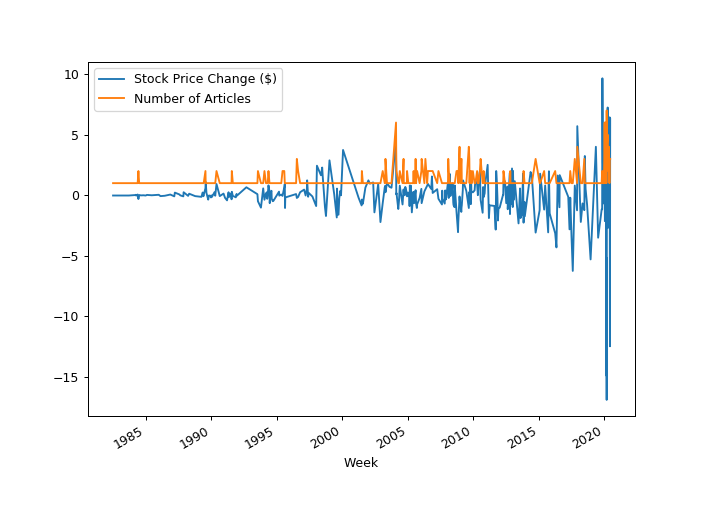

In [31]:
# Line plot.
merge_df.plot()

<IPython.core.display.Javascript object>


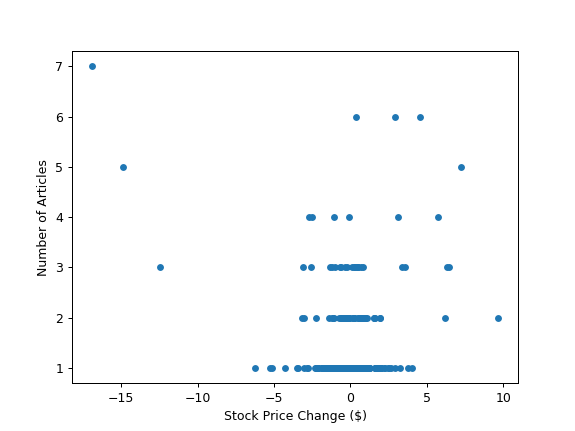

In [32]:
# Scatter plot.
merge_df.plot.scatter("Stock Price Change ($)","Number of Articles")